Em xin lỗi thầy vì đã nộp bài muộn do em sơ suất không kiểm tra teams mà cứ nghĩ sẽ nộp code trên kaggle ạ. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import inception_resnet_v2, EfficientNetB0, InceptionResNetV2
from keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization, Activation, GlobalAveragePooling2D, UpSampling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from imutils import paths

##Train dataset

In [ ]:
#importing required modules
from zipfile import ZipFile

#specifying the zip file name
file_name = "/content/drive/My Drive/DEEPLEARNING/train.zip"

#opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:

	#extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

Extracting all the files now...
Done!


In [ ]:
#Lấy các đường dẫn đến ảnh.
train_path = list(paths.list_images('/content/seg_train'))
len(train_path)

# Đổi vị trí ngẫu nhiên các đường dẫn ảnh
random.shuffle(train_path)

In [ ]:
for folder in os.listdir('/content/seg_train'):
    files_path = []
    for file in os.listdir(os.path.join('/content/seg_train',folder)):
        files_path.append(file)
    print(f'For training data, has {len(files_path)} in folder {folder}.')

For training data, has 2191 in folder buildings.
For training data, has 2382 in folder street.
For training data, has 2512 in folder mountain.
For training data, has 2404 in folder glacier.
For training data, has 2271 in folder forest.
For training data, has 2274 in folder sea.


In [ ]:
names = []
index = []

# Đường dẫn ảnh sẽ là dataset/tên_folder/tên_ảnh ví dụ seg_train/sea/2041.jpg nên p.split(os.path.sep)[-2]
labels = [p.split(os.path.sep)[-2] for p in train_path]
print(labels)

for l in labels:
  if l not in names:
    names.append(l)
print(names)

#Chuyển tên folder thành số
le = LabelEncoder()
labels = le.fit_transform(labels)
labels

for l in labels:
  if l not in index:
    index.append(l)
print(index)

dict_id = {names[i]: index[i] for i in range(len(names))}
print(dict_id)

#One-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

['sea', 'glacier', 'street', 'mountain', 'buildings', 'mountain', 'glacier', 'mountain', 'forest', 'forest', 'mountain', 'buildings', 'sea', 'street', 'mountain', 'forest', 'sea', 'forest', 'sea', 'buildings', 'sea', 'mountain', 'glacier', 'buildings', 'buildings', 'sea', 'glacier', 'buildings', 'forest', 'mountain', 'glacier', 'sea', 'sea', 'glacier', 'street', 'buildings', 'glacier', 'buildings', 'forest', 'mountain', 'forest', 'glacier', 'mountain', 'buildings', 'glacier', 'glacier', 'glacier', 'buildings', 'street', 'glacier', 'street', 'forest', 'forest', 'glacier', 'mountain', 'mountain', 'mountain', 'forest', 'sea', 'forest', 'glacier', 'mountain', 'glacier', 'sea', 'sea', 'mountain', 'mountain', 'street', 'sea', 'mountain', 'glacier', 'buildings', 'mountain', 'buildings', 'sea', 'mountain', 'glacier', 'sea', 'street', 'buildings', 'mountain', 'mountain', 'forest', 'buildings', 'glacier', 'mountain', 'mountain', 'mountain', 'mountain', 'forest', 'street', 'forest', 'street', 'bu

In [ ]:
train_df = []
for (j, trainPath) in enumerate(train_path):
    image = load_img(trainPath, target_size=(150, 150))
    
    train_df.append(image)   

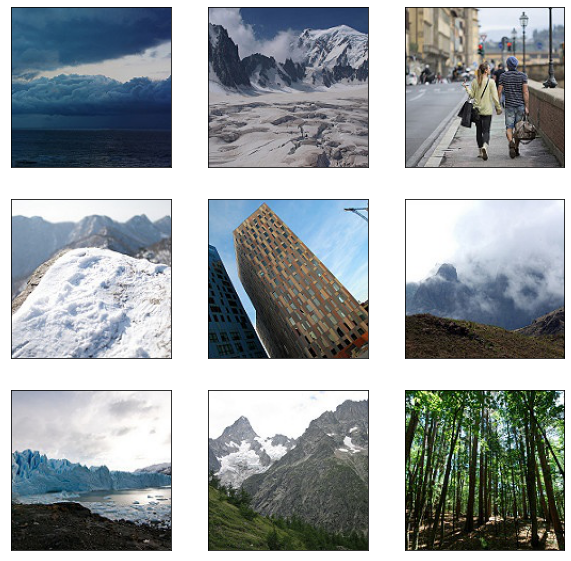

In [ ]:
for i in range(len(train_df)):
  train_df[i] = np.array(train_df[i])

#Hiển thị một số hình ảnh từ tập dữ liệu
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_df[i]) 
  plt.xticks([])
  plt.yticks([])

In [ ]:
train_df = np.array(train_df)

In [ ]:
print(train_df.shape)
print(labels.shape)

(14034, 150, 150, 3)
(14034, 6)


In [ ]:
#Chuyển đổi các giá trị pixel của tập dữ liệu thành kiểu float/int      
labels = labels.astype('float32')

#Chuẩn hóa tập dữ liệu
train_df = train_df.astype('float32') / 255.0

##Test dataset

In [ ]:
#importing required modules
from zipfile import ZipFile

#specifying the zip file name
file_name = "/content/drive/My Drive/DEEPLEARNING/test.zip"

#opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:

	#extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

Extracting all the files now...
Done!


In [ ]:
#Lấy các đường dẫn đến ảnh.
test_path = list(paths.list_images('/content/test'))
len(test_path)

3000

In [ ]:
test_df = []
test_id = []
for (j, testPath) in enumerate(test_path):
    image = load_img(testPath, target_size=(150, 150))
  
    test_df.append(image)
    test_id.append(testPath)

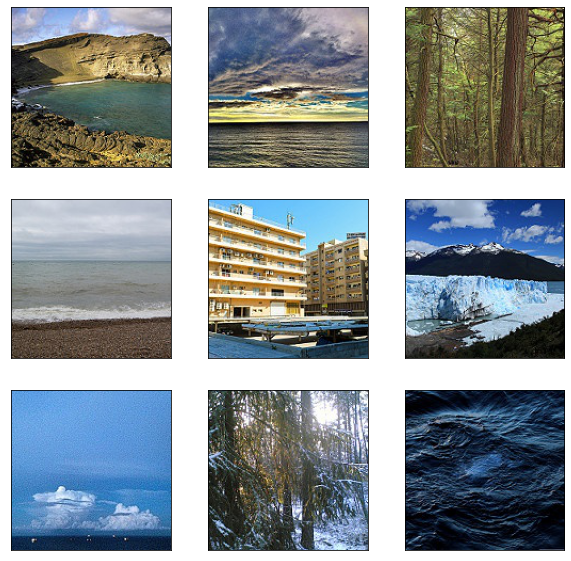

In [ ]:
for i in range(len(test_df)):
   test_df[i] = np.array(test_df[i])

#Hiển thị một số hình ảnh từ tập dữ liệu
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(test_df[i]) 
  plt.xticks([])
  plt.yticks([])

In [ ]:
test_df = np.array(test_df)
test_df = test_df.astype('float32') / 255.0

In [ ]:
test_df.shape

(3000, 150, 150, 3)

In [ ]:
test_id = pd.Series(test_id)
test_id

0       /content/test/2412.jpg
1       /content/test/1803.jpg
2         /content/test/97.jpg
3       /content/test/1344.jpg
4        /content/test/405.jpg
                 ...          
2995    /content/test/1614.jpg
2996     /content/test/815.jpg
2997    /content/test/1468.jpg
2998     /content/test/837.jpg
2999    /content/test/1830.jpg
Length: 3000, dtype: object

In [ ]:
test_id = test_id.str.split('/', expand=True).iloc[:,-1].str.split('.', expand=True)[0].astype('int')

In [ ]:
test_id

0       2412
1       1803
2         97
3       1344
4        405
        ... 
2995    1614
2996     815
2997    1468
2998     837
2999    1830
Name: 0, Length: 3000, dtype: int64

##Model 


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

def define_model(n_layers=150,BASE_MODEL='InceptionResNetV2'):
        base_model = InceptionResNetV2(input_shape=(150,150,3),include_top=False,weights='imagenet')
        head_model = base_model

        for layers in base_model.layers[:n_layers]:
            layers.trainable=False

        head_model = head_model.output
        head_model = UpSampling2D()(head_model)
        head_model = UpSampling2D()(head_model)
        head_model = tf.keras.layers.GlobalAveragePooling2D()(head_model)
        head_model = tf.keras.layers.Flatten(name="Flatten")(head_model)
        head_model = tf.keras.layers.Dense(512,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.3)(head_model)
        head_model = tf.keras.layers.Dense(32,activation='relu')(head_model)
        head_model = tf.keras.layers.Dropout(0.3)(head_model)
        prediction_layer = tf.keras.layers.Dense(6, activation='softmax')(head_model)
        model = tf.keras.Model(inputs=base_model.input,outputs=prediction_layer)
        return model

In [ ]:
model222 = define_model(BASE_MODEL='InceptionResNetV2')

In [ ]:
model_name = "modelInceptionResnetV2-2.h5"
checkpoint = ModelCheckpoint(model_name, monitor="val_loss", mode="min",
                             save_best_only = True, verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', patience=8, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, 
                          factor=0.3, min_lr=1e-6, verbose=1)
callbacks = [checkpoint,es,rlrop]

model222.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
abc = model222.fit(train_df, labels, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks = callbacks)

Epoch 1/20
351/351 [==============================] - ETA: 0s - loss: 0.6414 - accuracy: 0.7967
Epoch 1: val_loss improved from inf to 0.49674, saving model to modelInceptionResnetV2-2.h5
351/351 [==============================] - 129s 291ms/step - loss: 0.6414 - accuracy: 0.7967 - val_loss: 0.4967 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 2/20
351/351 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.8826
Epoch 2: val_loss improved from 0.49674 to 0.49025, saving model to modelInceptionResnetV2-2.h5
351/351 [==============================] - 99s 283ms/step - loss: 0.3851 - accuracy: 0.8826 - val_loss: 0.4903 - val_accuracy: 0.8678 - lr: 0.0010
Epoch 3/20
351/351 [==============================] - ETA: 0s - loss: 0.3245 - accuracy: 0.8987
Epoch 3: val_loss improved from 0.49025 to 0.41908, saving model to modelInceptionResnetV2-2.h5
351/351 [==============================] - 97s 275ms/step - loss: 0.3245 - accuracy: 0.8987 - val_loss: 0.4191 - val_accuracy: 0.8650

In [ ]:
#Create a function to plot loss curves
def plot_loss_acc(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history["loss"], label="training_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure(figsize=(6, 4))
    plt.plot(history.history["accuracy"], label="training_accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [ ]:
plot_loss_acc(abc)

##Test on the model

In [ ]:
y_pred = model222.predict(test_df) 
y_pred_labels = np.argmax(y_pred,axis=1)
print('Prediction Shape is {}'.format(y_pred_labels.shape))

In [ ]:
sample = pd.read_csv('/content/drive/My Drive/DEEPLEARNING/sample.csv')
submit = sample.copy(deep=True)
submit.label = y_pred_labels
submit.id = test_id
submit.sort_values(by='id',inplace=True)
submit.to_csv(path_or_buf='./prediction112.csv', index=False)

In [ ]:
submit.head(10)

In [ ]:
model222.save("/content/drive/MyDrive/DEEPLEARNING/model112.h5")
model222.save_weights("/content/drive/MyDrive/DEEPLEARNING/weight_model112.h5")

In [ ]:
print("The training accuracy is :", abc.history['accuracy'][-1])
print("The validation accuracy is :", abc.history['val_accuracy'][-1],'\n')
print("The training loss is :", abc.history['loss'][-1])
print("The validation loss is :", abc.history['val_loss'][-1])

In [ ]:
from tensorflow.keras.models import load_model

modell = load_model('/content/modelInceptionResnetV2-2.h5')

In [ ]:
y_pred = modell.predict(test_df) 
y_pred_labels = np.argmax(y_pred,axis=1)
print('Prediction Shape is {}'.format(y_pred_labels.shape))

94/94 [==============================] - 19s 90ms/step
Prediction Shape is (3000,)


In [ ]:
sample = pd.read_csv('/content/drive/My Drive/DEEPLEARNING/sample.csv')
submit = sample.copy(deep=True)
submit.label = y_pred_labels
submit.id = test_id
submit.sort_values(by='id',inplace=True)
submit.to_csv(path_or_buf='./prediction112.csv', index=False)

In [ ]:
submit.head(10)

,id,label
647,0,5
848,1,4
2465,2,0
28,3,2
1663,4,4
1301,5,0
1407,6,4
995,7,3
1419,8,5
456,9,2


In [ ]:
modell.save("/content/drive/MyDrive/DEEPLEARNING/model112.h5")
modell.save_weights("/content/drive/MyDrive/DEEPLEARNING/weight_model112.h5")

In [ ]:
class_names = ['buildings','forest','glacier','mountain','sea','street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
print(class_labels)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [ ]:
# sample prediciton on unseen data using model
plt.figure(figsize=(16,9))

for idx, i in enumerate(y_pred_labels):
    plt.subplot(3,3,idx+1)
    plt.imshow(test_df[idx])
    plt.title(f"Prediction of image: {class_names[i]}")
    plt.xticks([])
    plt.yticks([])
    
plt.suptitle("Samples predictions of model on unseen data", size=20, weight='bold')
plt.show()